In [1]:
#packages
import os
import pandas as pd
import seaborn as sn
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams.update(plt.rcParamsDefault)
plt.style.use('seaborn-whitegrid')

In [2]:
#Change working directory
os.chdir('/Users/aleksandrabahareva/Downloads')

In [3]:
df_merged = pd.read_csv('df_merged.csv', parse_dates=['Date'], index_col='Date')

In [4]:
rol_df_btc = df_merged['Energy GW'].rolling(window=150)
rol_df_btc

Rolling [window=150,center=False,axis=0]

In [5]:
rol_df_price = df_merged['BTC Price'].rolling(window=150)
rol_df_price

Rolling [window=150,center=False,axis=0]

In [6]:
rolling_corr = rol_df_btc.corr(rol_df_price)

In [7]:
rolling_corr

Date
2018-02-01         NaN
2018-02-02         NaN
2018-02-03         NaN
2018-02-04         NaN
2018-02-05         NaN
                ...   
2021-11-23    0.922612
2021-11-24    0.922631
2021-11-25    0.922475
2021-11-26    0.922748
2021-11-27    0.922881
Length: 1393, dtype: float64

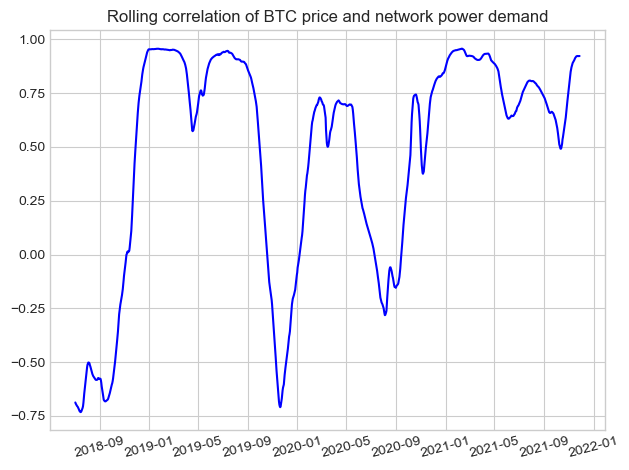

In [10]:
# plt.rcParams["figure.figsize"] = [7.00, 3.50] 
plt.rcParams["figure.autolayout"] = True

rolling_corr_plot = plt.plot(rolling_corr, color='blue',label='Original')
plt.xticks(rotation=15)
plt.title('Rolling correlation of BTC price and network power demand')
plt.savefig('correlation.png', dpi=400, transparent=True)
plt.show()
plt.close()

Date
2018-02-01          NaN
2018-02-02          NaN
2018-02-03          NaN
2018-02-04          NaN
2018-02-05          NaN
                ...    
2021-11-23    10.582035
2021-11-24    10.619667
2021-11-25    10.657341
2021-11-26    10.694650
2021-11-27    10.732759
Name: Energy GW, Length: 1393, dtype: float64 Date
2018-02-01         NaN
2018-02-02         NaN
2018-02-03         NaN
2018-02-04         NaN
2018-02-05         NaN
                ...   
2021-11-23    1.979736
2021-11-24    1.973062
2021-11-25    1.961991
2021-11-26    1.949498
2021-11-27    1.934191
Name: Energy GW, Length: 1393, dtype: float64


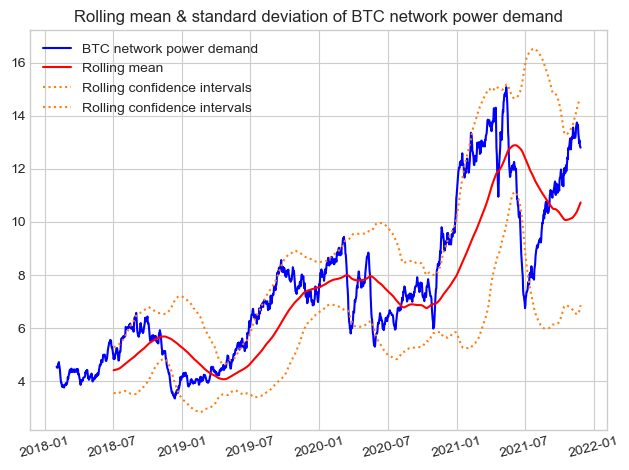

In [11]:
#Determining rolling statistics
#Rolling mean
rolmean1 = df_merged['Energy GW'].rolling(window=150).mean()

#Rolling standard deviation
rolstd1 = df_merged['Energy GW'].rolling(window=150).std()
print(rolmean1, rolstd1)

#Plot rolling statistics:
orig1 = plt.plot(df_merged['Energy GW'], color='blue',label='BTC network power demand')
mean1 = plt.plot(rolmean1, color='red', label='Rolling mean')
std1pm = plt.plot(rolmean1+2*rolstd1, color='tab:orange', ls=':', label='Rolling confidence intervals')
std1mm = plt.plot(rolmean1-2*rolstd1, color='tab:orange', ls=':', label='Rolling confidence intervals')
plt.xticks(rotation=15)

plt.legend(loc='best')
plt.title('Rolling mean & standard deviation of BTC network power demand')
plt.savefig('roll_stat_1.png', dpi=400, transparent=True)
plt.show(block=False)

Date
2018-02-01             NaN
2018-02-02             NaN
2018-02-03             NaN
2018-02-04             NaN
2018-02-05             NaN
                  ...     
2021-11-23    48511.648828
2021-11-24    48713.650938
2021-11-25    48917.088438
2021-11-26    49110.969662
2021-11-27    49310.363828
Name: BTC Price, Length: 1393, dtype: float64 Date
2018-02-01             NaN
2018-02-02             NaN
2018-02-03             NaN
2018-02-04             NaN
2018-02-05             NaN
                  ...     
2021-11-23    10838.619896
2021-11-24    10860.870817
2021-11-25    10877.391621
2021-11-26    10902.391713
2021-11-27    10916.830456
Name: BTC Price, Length: 1393, dtype: float64


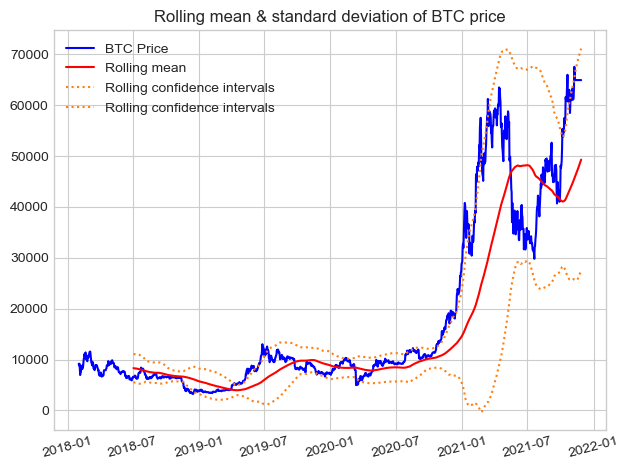

In [12]:
#Determining rolling statistics
#Rolling mean
rolmean2 = df_merged['BTC Price'].rolling(window=150).mean()

#Rolling standard deviation
rolstd2 = df_merged['BTC Price'].rolling(window=150).std()
print(rolmean2, rolstd2)

#Plot rolling statistics:
orig2 = plt.plot(df_merged['BTC Price'], color='blue',label='BTC Price')
mean2 = plt.plot(rolmean2, color='red', label='Rolling mean')
std2pm = plt.plot(rolmean2+2*rolstd2, color='tab:orange', ls=':', label='Rolling confidence intervals')
std2mm = plt.plot(rolmean2-2*rolstd2, color='tab:orange', ls=':', label='Rolling confidence intervals')
plt.xticks(rotation=15)
plt.legend(loc='best')
plt.title('Rolling mean & standard deviation of BTC price')
plt.savefig('roll_stat_2.png', dpi=400, transparent=True)
plt.show(block=False)

In [13]:
diff_btc = df_merged['Energy GW'].diff()

In [14]:
diff_price = df_merged['BTC Price'].diff()

Date
2018-02-01         NaN
2018-02-02         NaN
2018-02-03         NaN
2018-02-04         NaN
2018-02-05         NaN
                ...   
2021-11-23    0.033393
2021-11-24    0.037632
2021-11-25    0.037675
2021-11-26    0.037309
2021-11-27    0.038109
Name: Energy GW, Length: 1393, dtype: float64 Date
2018-02-01         NaN
2018-02-02         NaN
2018-02-03         NaN
2018-02-04         NaN
2018-02-05         NaN
                ...   
2021-11-23    0.177836
2021-11-24    0.171794
2021-11-25    0.171737
2021-11-26    0.171900
2021-11-27    0.171317
Name: Energy GW, Length: 1393, dtype: float64


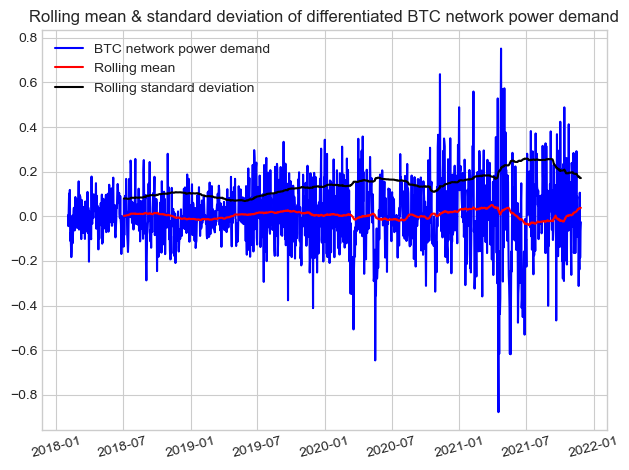

In [15]:
#Determining rolling statistics of differentiated data
#Rolling mean
rolmean3 = diff_btc.rolling(window=150).mean()

#Rolling standard deviation
rolstd3 = diff_btc.rolling(window=150).std()
print(rolmean3, rolstd3)

#Plot rolling statistics:
orig3 = plt.plot(diff_btc, color='blue',label='BTC network power demand')
mean3 = plt.plot(rolmean3, color='red', label='Rolling mean')
std3 = plt.plot(rolstd3, color='black', label='Rolling standard deviation')
plt.xticks(rotation=15)
plt.legend(loc='best')
plt.title('Rolling mean & standard deviation of differentiated BTC network power demand')
plt.savefig('roll_stat_3.png', dpi=400, transparent=True)
plt.show(block=False)

Date
2018-02-01           NaN
2018-02-02           NaN
2018-02-03           NaN
2018-02-04           NaN
2018-02-05           NaN
                 ...    
2021-11-23    218.424557
2021-11-24    202.002109
2021-11-25    203.437500
2021-11-26    193.881224
2021-11-27    199.394167
Name: BTC Price, Length: 1393, dtype: float64 Date
2018-02-01            NaN
2018-02-02            NaN
2018-02-03            NaN
2018-02-04            NaN
2018-02-05            NaN
                 ...     
2021-11-23    1555.543980
2021-11-24    1544.649417
2021-11-25    1544.359034
2021-11-26    1541.128450
2021-11-27    1538.929747
Name: BTC Price, Length: 1393, dtype: float64


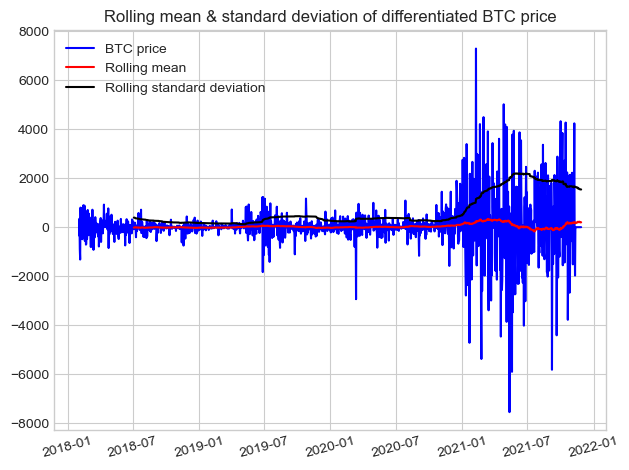

In [16]:
#Determining rolling statistics of differentiated data
#Rolling mean
rolmean4 = diff_price.rolling(window=150).mean()

#Rolling standard deviation
rolstd4 = diff_price.rolling(window=150).std()
print(rolmean4, rolstd4)

#Plot rolling statistics:
orig4 = plt.plot(diff_price, color='blue',label='BTC price')
mean4 = plt.plot(rolmean4, color='red', label='Rolling mean')
std4 = plt.plot(rolstd4, color='black', label='Rolling standard deviation')
plt.xticks(rotation=15)
plt.legend(loc='best')
plt.title('Rolling mean & standard deviation of differentiated BTC price')
plt.savefig('roll_stat_4.png', dpi=400, transparent=True)
plt.show(block=False)

In [27]:
plt.scatter(df_merged['Energy GW'], df_merged['BTC Price'], marker='o')
plt.title('Scatter plot of BTC price and network power demand')
plt.savefig('scatter1.png', dpi=400, transparent=True)

In [28]:
plt.scatter(diff_price, diff_btc, marker='o')
plt.title('Scatter plot of differentiated BTC price and network power demand')
plt.savefig('scatter2.png', dpi=400, transparent=True)

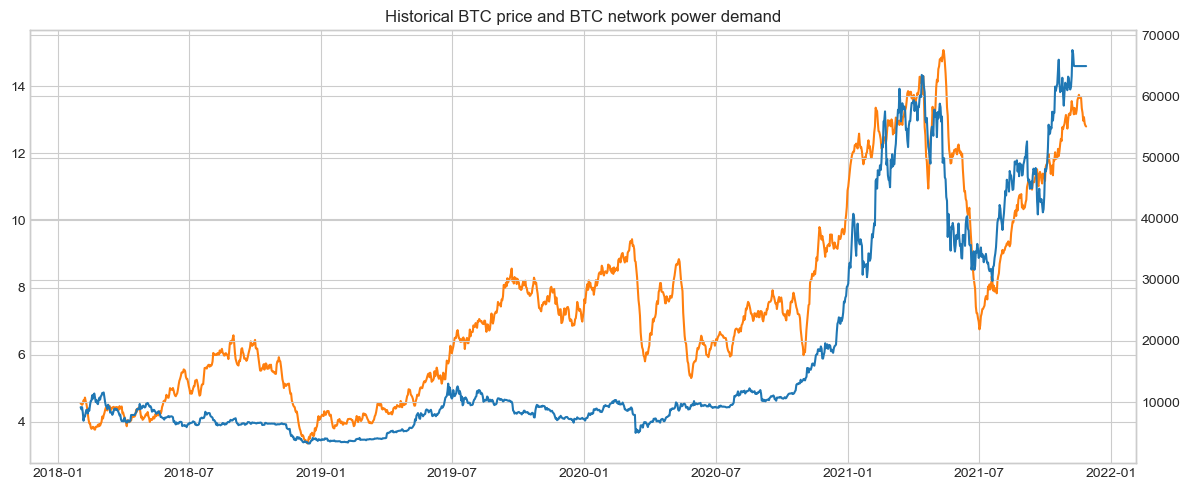

In [25]:
#Plotting historical BTC price and network power demand on the same chart 
fig, ax1 = plt.subplots(figsize=(12,5))
ax1.plot(df_merged['Energy GW'], color = 'tab:orange')
ax2 = ax1.twinx()
ax2.plot(df_merged['BTC Price'])
plt.xticks(rotation=15)
plt.title('Historical BTC price and BTC network power demand')
plt.savefig('2lines_historical.png', dpi=400, transparent=True)
plt.show(block=False)